In [ ]:
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns

In [ ]:
df = pd.read_csv('covid.csv')
df.head() # top 5 rows

,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018
0,4/6/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
1,4/5/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
2,4/4/2020,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
3,4/3/2020,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
4,4/2/2020,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0


In [ ]:
df.shape
# num of rows = 9107
# num of cols = 10

(9107, 10)

In [ ]:
df.dtypes

date                     object
day                       int64
month                     int64
year                      int64
cases                     int64
deaths                    int64
countries                object
geoId                    object
countryterritoryCode     object
popData2018             float64
dtype: object

In [ ]:
df.dtypes.value_counts()

int64      5
object     4
float64    1
dtype: int64

In [ ]:
# converting date to datetime data type
df['date'] = pd.to_datetime(df['date'])  

In [ ]:
df.dtypes

date                    datetime64[ns]
day                              int64
month                            int64
year                             int64
cases                            int64
deaths                           int64
countries                       object
geoId                           object
countryterritoryCode            object
popData2018                    float64
dtype: object

In [ ]:
# Extracting Quarter from the date column (which has been converted to datetime datatype) 
df['qtr'] = df['date'].dt.quarter
df.head()

,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018,qtr
0,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0,2
1,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0,2
2,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0,2
3,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0,2
4,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0,2


In [ ]:
print(df.columns)
print(df.shape)

Index(['date', 'day', 'month', 'year', 'cases', 'deaths', 'countries', 'geoId',
       'countryterritoryCode', 'popData2018', 'qtr'],
      dtype='object')
(9107, 11)


In [ ]:
df['qtr'].value_counts()

1    7835
2    1205
4      67
Name: qtr, dtype: int64

### Scatterplot
1) Scatter plots are the graphs that present the relationship between two continuous variables in a data-set.<br>
2) It is used to determine the covariance or the correaltion between two variables.

Syntax<br>
<b>sns.scatterplot(data,x,y,hue,size,palette)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column that determines the colors(column which will be used to group the data)<br>
size - column that determines the size of the markers used in scatterplot<br>
palette - determines the color palette used for coloring the markers of sctterplot<br>

#### Plot a scatter Chart between Cases and Deaths using seaborn

In [ ]:
df.columns

Index(['date', 'day', 'month', 'year', 'cases', 'deaths', 'countries', 'geoId',
       'countryterritoryCode', 'popData2018', 'qtr'],
      dtype='object')

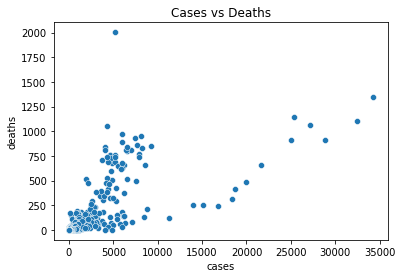

In [ ]:
sns.scatterplot(data=df,x='cases',y='deaths')
plt.title('Cases vs Deaths')
plt.show()

#### Plot a scatter Chart between Cases and Deaths based on month

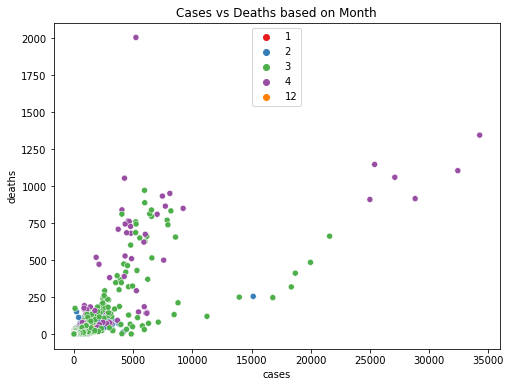

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='cases',y='deaths',hue='month',palette='Set1')
plt.title('Cases vs Deaths based on Month')
plt.legend(loc=9)
plt.show()

#### Plot a scatter Chart between Cases and Deaths based on month where size of the scatter plot is based on cases

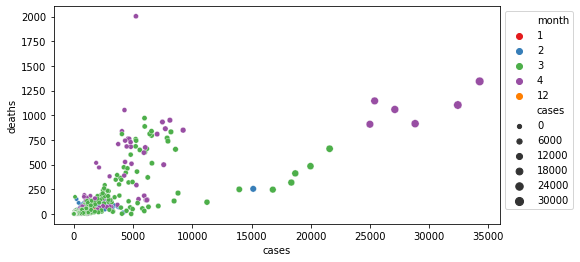

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df,x='cases',y='deaths',hue='month',
                palette='Set1',size='cases')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Boxplot
A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum. 

Q1: 25 percentile<br>
Q2: 50 percentile (Medium)<br>
Q3: 75 percentile<br>
min: Q1 - 1.5 * IQR<br>
max: Q3 + 1.5 * IQR<br>
IQR: Inter Quartile Range: Q3 - Q1<br>

Syntax<br>
<b>sns.boxplot(data,x,y,hue)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column to determines the colors(column that is used for grouping)<br>

#### Plot month wise boxplot for covid cases for India for Mar and Apr

In [ ]:
# Filtering the dataframe where theCountry is India and month is either Mar or Apr
df_india = df[(df['countries']=='India') & (df['month'].isin([3,4]))]
df_india.shape

(36, 11)

In [ ]:
df_india['countries'].value_counts()

India    36
Name: countries, dtype: int64

In [ ]:
df_india['month'].value_counts()

3    30
4     6
Name: month, dtype: int64

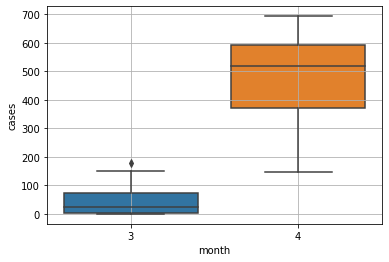

In [ ]:
sns.boxplot(data=df_india,x='month',y='cases')
plt.grid()
plt.show()

#### Plot boxplot for the number of cases for the countries Belgium, South_Africa, Argentina, Portugal, Switzerland

In [ ]:
clist = ['Belgium','South_Africa','Argentina','Portugal','Switzerland']
df_5c = df[df['countries'].isin(clist)]
df_5c.shape

(292, 11)

In [ ]:
df_5c['countries'].value_counts()

Switzerland     98
Belgium         98
Portugal        35
Argentina       31
South_Africa    30
Name: countries, dtype: int64

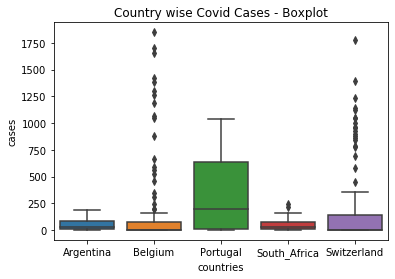

In [ ]:
sns.boxplot(data=df_5c,x='countries',y='cases')
plt.title('Country wise Covid Cases - Boxplot')
plt.show()

#### Plot boxplot for the number of cases for Portugal

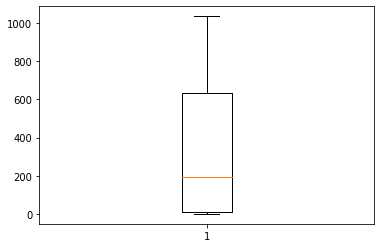

In [ ]:
df_port = df[df['countries']=='Portugal']

plt.boxplot(data=df_port,x='cases')
plt.show()

#### Plot boxplot for the number of cases for Poland

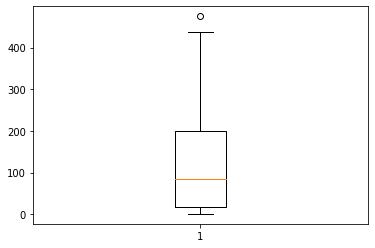

In [ ]:
df_pol = df[df['countries']=='Poland']

plt.boxplot(data=df_pol,x='cases')
plt.show()

In [ ]:
r1 = df.groupby(['countries'])['cases'].sum().reset_index()
r1[r1['cases'].between(200,400)]

,countries,cases
0,Afghanistan,299
1,Albania,361
31,Burkina_Faso,345
46,Cote_dIvoire,261
48,Cuba,320
75,Ghana,214
88,Honduras,298
102,Jordan,345
107,Kyrgyzstan,216
121,Malta,234


#### Plot boxplot for the number for cases the countries Albania, San_Marino, Vietnam, Oman, Taiwan

In [ ]:
clist = ['Albania','San_Marino','Vietnam','Oman','Taiwan']

df_r1 = df[df['countries'].isin(clist)]
df_r1.shape

(408, 11)

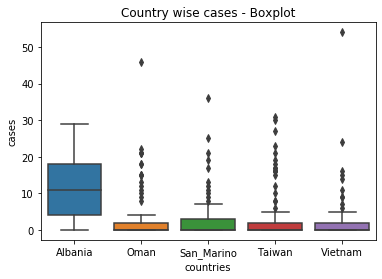

In [ ]:
sns.boxplot(data=df_r1,x='countries',y='cases')
plt.title('Country wise cases - Boxplot')
plt.show()

### ViolinPlot
1) Violinplot is a combination of boxplot and KDE(Kernel Density Estimate)<br>
2) A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data.<br> 
3) It is used to visualize the distribution of numerical data.<br>
4) Violinplots are symmetrical<br>

Syntax<br>
<b>sns.violinplot(data,x,y, hue, split)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column to determines the colors(used of grouping)<br>
split - used only when hue parameter has 2 catgories. It splits the violinplot in 2 different halves<br>

#### Plot month wise violinplot for covid cases for India for Mar and Apr

In [ ]:
print(df_india['countries'].value_counts())  # India
print(df_india['month'].value_counts())  # 3,4

India    36
Name: countries, dtype: int64
3    30
4     6
Name: month, dtype: int64


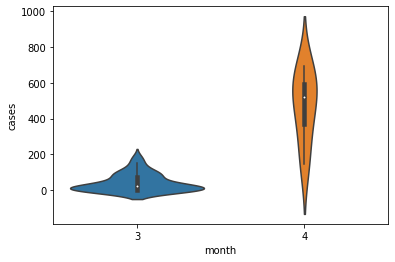

In [ ]:
sns.violinplot(data=df_india,x='month',y='cases')
plt.show()

#### Plot violinplot for the number of cases for Countries Switzerland, Belgium, Portugal, Argentina, South_Africa

In [ ]:
df_5c['countries'].value_counts()

Switzerland     98
Belgium         98
Portugal        35
Argentina       31
South_Africa    30
Name: countries, dtype: int64

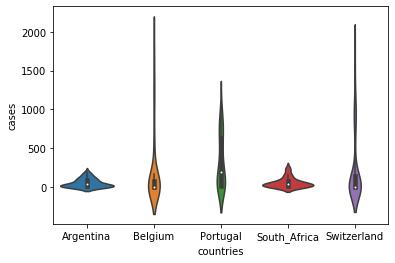

In [ ]:
sns.violinplot(data=df_5c,x='countries',y='cases')
plt.show()

In [ ]:
# df_5c["month"].value_counts()
df_ma = df_5c[df_5c['month'].isin([3,4])]
df_ma.shape

(170, 11)

#### Plot violinplot for the number of cases for Countries Switzerland, Belgium, Portugal, Argentina, South_Africa sing hue paramter as Month. For the months Mar and Apr

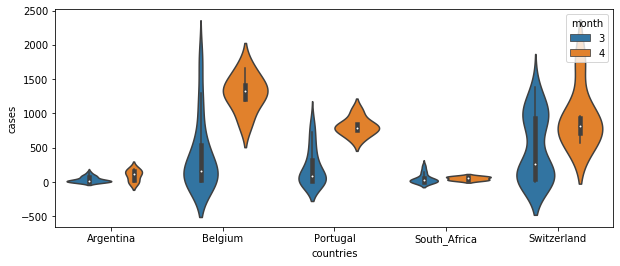

In [ ]:
plt.figure(figsize=(10,4))
sns.violinplot(data=df_ma,x='countries',y='cases',hue='month')
plt.show()

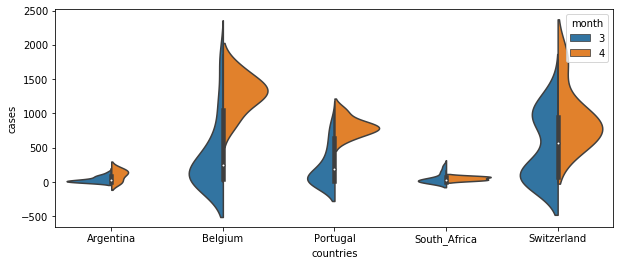

In [ ]:
plt.figure(figsize=(10,4))
sns.violinplot(data=df_ma,x='countries',y='cases',hue='month',split=True)
plt.show()